<a href="https://colab.research.google.com/github/lovefamilykien/AI/blob/main/AI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=d93046be31f35df64a3b3007b016cd2c8d48dbbfac23e6079925aba3cc90a49e
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [2]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

Bài toán nồi cơm điện 

62.012987012987004


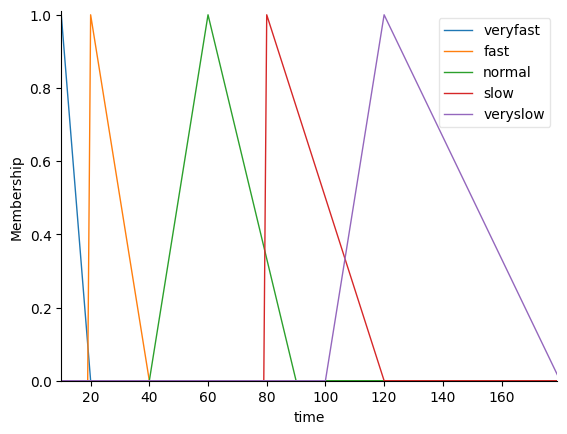

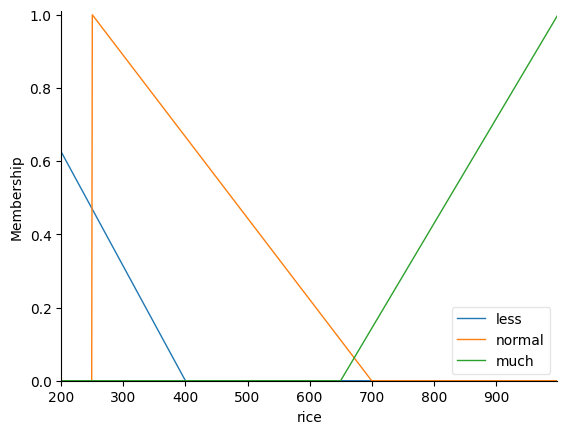

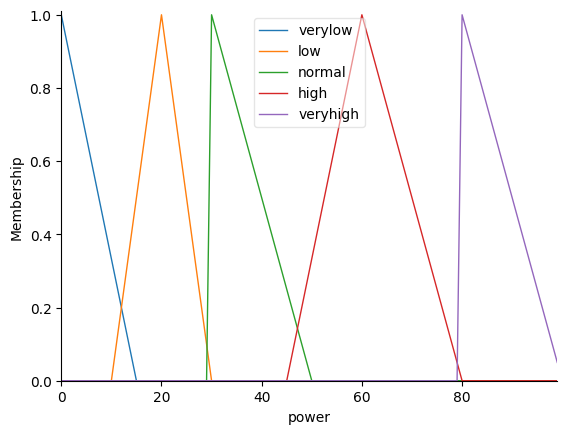

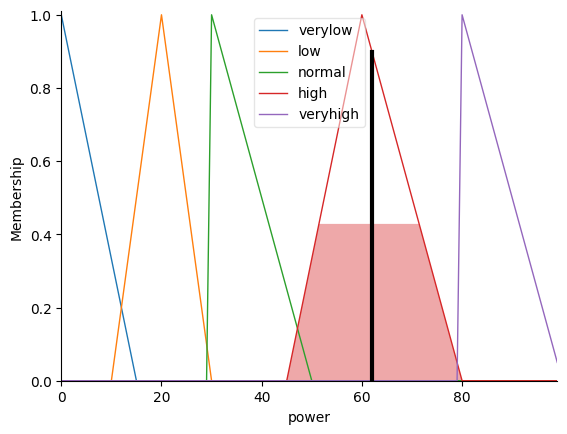

In [3]:
# Các yếu tố ảnh hưởng đến độ chín của cơm
time = ctrl.Antecedent(np.arange(10,180,1), 'time')
rice = ctrl.Antecedent(np.arange(200,1000,1), 'rice')
power = ctrl.Consequent(np.arange(0,100,1), 'power')

# Tạo hàm cho từng yếu tố theo dạng tam giác
time['veryfast'] = fuzz.trimf(time.universe, [10,10,20])
time['fast'] = fuzz.trimf(time.universe, [20,20,40])
time['normal'] = fuzz.trimf(time.universe, [40,60,90])
time['slow'] = fuzz.trimf(time.universe, [80,80,120])
time['veryslow'] = fuzz.trimf(time.universe, [100,120,180])

rice['less'] = fuzz.trimf(rice.universe, [80,80,400])
rice['normal'] = fuzz.trimf(rice.universe, [250,250,700])
rice['much'] = fuzz.trimf(rice.universe, [650,1000,1000])

power['verylow']= fuzz.trimf(power.universe,[0,0,15])
power['low']= fuzz.trimf(power.universe,[10,20,30])
power['normal']= fuzz.trimf(power.universe,[30,30,50])
power['high']= fuzz.trimf(power.universe,[45,60,80])
power['veryhigh']= fuzz.trimf(power.universe,[80,80,100])

# Tạo một mảng để chứa các luật để máy hiểu phân tích và xử lí
rule = []

# Thêm các luật vào mảng luật đã khai báo ở trên
rule.append(ctrl.Rule(time['veryfast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['veryfast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['veryfast'] & rice['much'], power['veryhigh']))

rule.append(ctrl.Rule(time['fast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['fast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['fast'] & rice['much'], power['veryhigh']))

rule.append(ctrl.Rule(time['normal'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['normal'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['normal'] & rice['much'], power['high']))

rule.append(ctrl.Rule(time['slow'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['slow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['slow'] & rice['much'], power['high']))

rule.append(ctrl.Rule(time['veryslow'] & rice['less'], power['verylow']))
rule.append(ctrl.Rule(time['veryslow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['veryslow'] & rice['much'], power['normal']))

# Dùng Ctrl của skfuzzy 
cooker_control = ctrl.ControlSystem(rule)
cooker_simulation = ctrl.ControlSystemSimulation(cooker_control)

# Hàm view() dùng để xuất đồ thị ra
time.view()
rice.view()
power.view()

# Nhập thông số đầu vào cho nồi cơm điện tính toán
cooker_simulation.input['rice'] = 800
cooker_simulation.input['time'] = 70
cooker_simulation.compute()

# In giá trị đầu ra của công suất
print(cooker_simulation.output['power'])

# Xem đường đồ thị của công suất đầu ra
power.view(sim = cooker_simulation)

Bài toán Bồn Nước

40.14413423810259


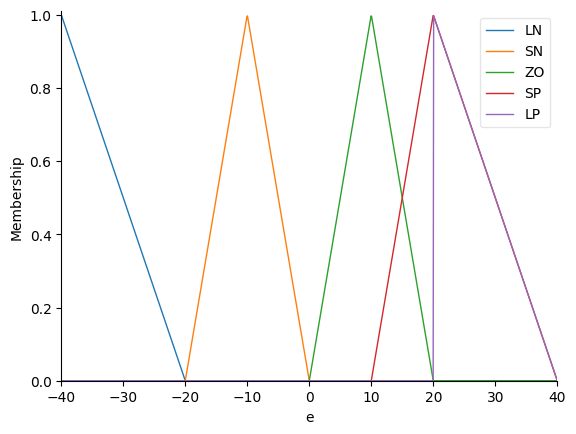

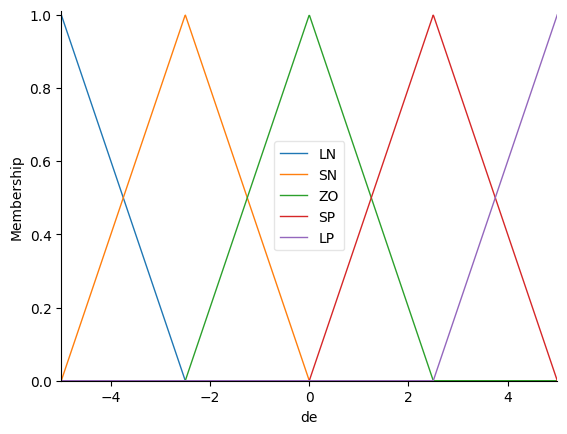

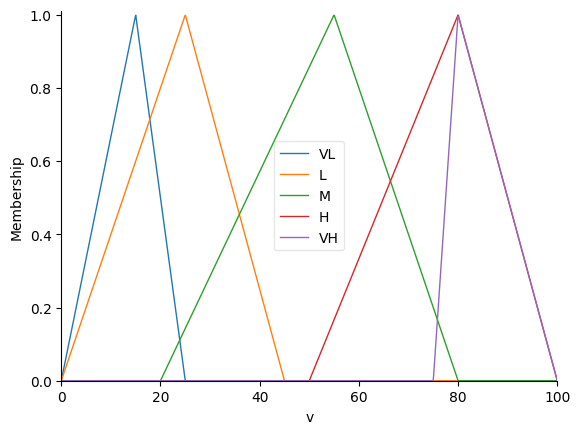

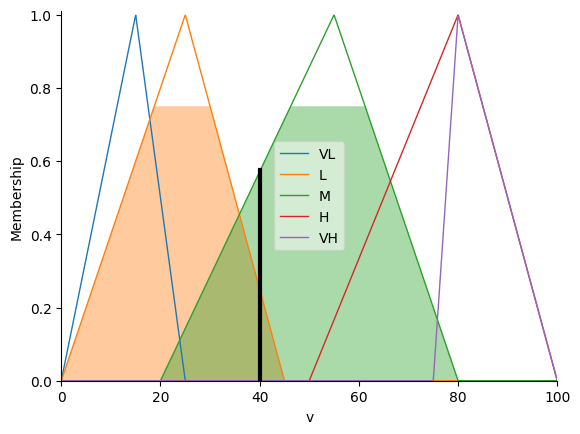

In [4]:
# Thông số đầu vào cần thiết của bồn nước
e  = ctrl.Antecedent(np.linspace(-40, 40, 1000), 'e') # errol
de = ctrl.Antecedent(np.linspace(-5, 5, 1000), 'de')  # d(errol)

# Thông số đầu ra mức nước của bồn
v = ctrl.Consequent(np.linspace(0, 100, 1000), 'v')

# Membership functions
e['LN'] = fuzz.trimf(e.universe,[-40, -40, -20])
e['SN'] = fuzz.trimf(e.universe,[-20, -10, 0])
e['ZO'] = fuzz.trimf(e.universe,[-0, 10, 20])
e['SP'] = fuzz.trimf(e.universe,[10, 20, 40])
e['LP'] = fuzz.trimf(e.universe,[20, 20, 40])

de['LN'] = fuzz.trimf(de.universe,[-5, -5, -2.5])
de['SN'] = fuzz.trimf(de.universe,[-5, -2.5, 0])
de['ZO'] = fuzz.trimf(de.universe,[-2.5, 0, 2.5])
de['SP'] = fuzz.trimf(de.universe,[0, 2.5, 5])
de['LP'] = fuzz.trimf(de.universe,[2.5, 5, 5])

v['VL'] = fuzz.trimf(v.universe,[ 0,  15,  25])
v['L']  = fuzz.trimf(v.universe,[ 0, 25,  45])
v['M']  = fuzz.trimf(v.universe,[20, 55,  80])
v['H']  = fuzz.trimf(v.universe,[50, 80, 100])
v['VH'] = fuzz.trimf(v.universe,[75, 80, 100])

# Tạo một mảng để chứa các luật để máy hiểu phân tích và xử lí
rule = []

# Thêm các luật vào mảng luật đã khai báo ở trên
rule.append(ctrl.Rule(e['LN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['SN'], v['VH']))
rule.append(ctrl.Rule(e['LN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['SP'], v['H']))
rule.append(ctrl.Rule(e['LN'] & de['LP'], v['M']))

rule.append(ctrl.Rule(e['SN'] & de['LN'], v['VH']))
rule.append(ctrl.Rule(e['SN'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['ZO'], v['H']))
rule.append(ctrl.Rule(e['SN'] & de['SP'], v['M']))
rule.append(ctrl.Rule(e['SN'] & de['LP'], v['L']))

rule.append(ctrl.Rule(e['ZO'] & de['LN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['SN'], v['H']))
rule.append(ctrl.Rule(e['ZO'] & de['ZO'], v['M']))
rule.append(ctrl.Rule(e['ZO'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['ZO'] & de['LP'], v['L']))

rule.append(ctrl.Rule(e['SP'] & de['LN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['SN'], v['M']))
rule.append(ctrl.Rule(e['SP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['SP'], v['L']))
rule.append(ctrl.Rule(e['SP'] & de['LP'], v['VL']))

rule.append(ctrl.Rule(e['LP'] & de['LN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SN'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['ZO'], v['L']))
rule.append(ctrl.Rule(e['LP'] & de['SP'], v['VL']))
rule.append(ctrl.Rule(e['LP'] & de['LP'], v['VL']))

# Dùng Ctrl của skfuzzy 
valve_control = ctrl.ControlSystem(rule)
valve_simulation = ctrl.ControlSystemSimulation(valve_control)

# Hàm view() dùng để xuất đồ thị ra
e.view()
de.view()
v.view()

# Nhập thông số đầu vào cho Bồn nước tính toán
valve_simulation.input['e'] = 25
valve_simulation.input['de'] = -2.5
valve_simulation.compute()

# In giá trị đầu ra của độ mở valve
print(valve_simulation.output['v'])

# Xem đường đồ thị của độ mở valve đầu ra đầu ra
v.view(sim = valve_simulation)